# 1. Train a Knn classifier with sklearn

## 1.1. Setup

In [1]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.2. Load dataset

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [5]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [6]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## 1.3. Split data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

## 1.4. Visualization

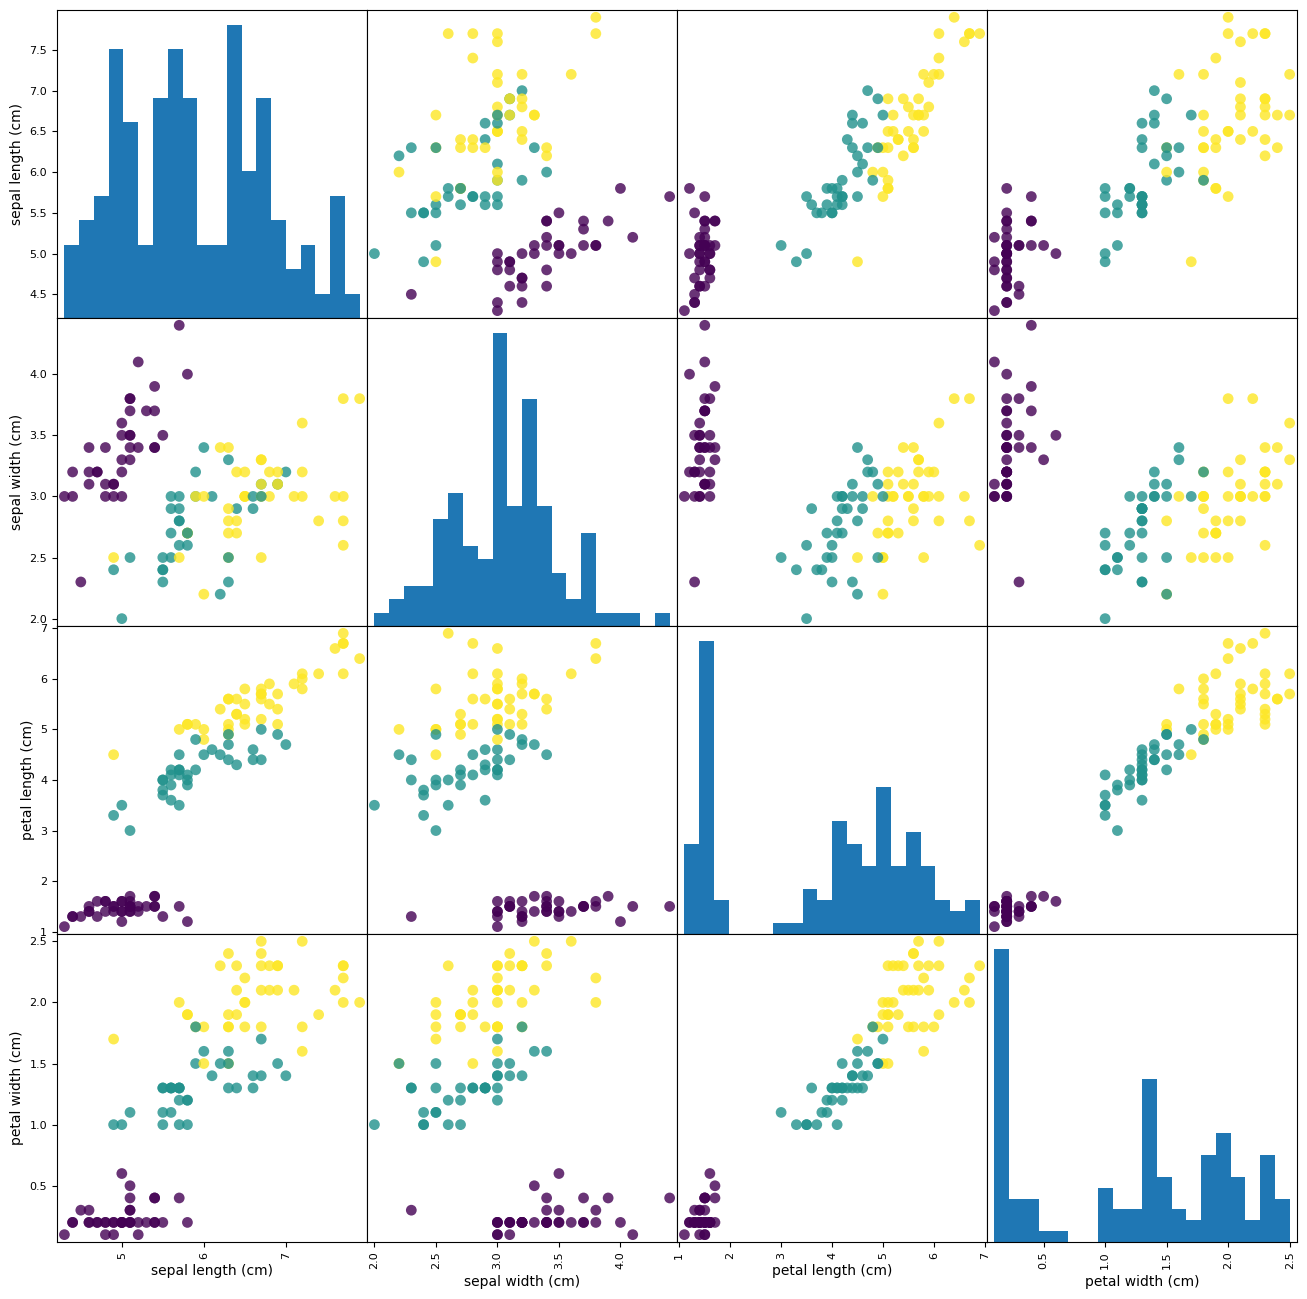

In [10]:
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# Create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(16, 16),
                           marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8);

## 1.5. Build a model and predit.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
scaler = MinMaxScaler()#creating an object
scaler.fit(X_train)#calculate min and max value of the training data

X_train_norm = scaler.transform(X_train) #apply normalisation to the training set
X_test_norm = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm) 
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_pred, y_test)))

Accuracy on test set: 0.95
